# CS5242 HW1: Get started with PyTorch

PyTorch is an open source machine learning framework with 58k stars on the [github](https://github.com/pytorch/pytorch). In this code tutorial we will learn the basic of PyTorch.

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.

## Section 1: Environmental Setup

First, we need to install the PyTorch and check the pytorch version.

In [1]:
!pip3 install torch

import torch
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.12.1+cu113'

Here are some routines for importing and setting up torch.

In [2]:
# frequently used import
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import matplotlib.pyplot as plt

# fix the random number so that the experiments are reproducible
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

The best referrence for pytorch is its [document](https://pytorch.org/docs/stable/index.html). PyTorch is well-known for a good community.

Now let's setup the GPU environment. The colab provides a free GPU to use. Do as follows:

- Runtime -> Change Runtime Type -> select `GPU` in Hardware accelerator
- Click `connect` on the top-right

After connecting to one GPU, you can check its status using `nvidia-smi` command.

In [3]:
!nvidia-smi

Sat Aug 27 18:03:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Here, you can see the memory and memory usage of the applied GPU. For my case, the applied one is a Tesla T4. The GPU applied may be different, but it is ok for our experiments.

Now let's create tensor, which is the basic element in PyTorch.

In [4]:
x1 = torch.tensor(1.0) # tensor on CPU
x2 = torch.tensor(1.0, device="cuda:0") # tensor on GPU
x3 = torch.tensor(1.0, requires_grad=True).cuda() # tensor on GPU and require grad
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)

x1: tensor(1.)
x2: tensor(1., device='cuda:0')
x3: tensor(1., device='cuda:0', grad_fn=<ToCopyBackward0>)


In the following sections, you need to fill in the code to complete the function and answer the questions.

The question will be in the form:

===> Question: What is deep learning?  
===> Answer:  
Your answer here.

The code completion will be in the form:

In [5]:
# === Complete the code

# === Complete the code

Grades: HW1 is composed of two parts and 10 points in all. Each part contains 5 points.  

The homework on PDF consists of 10 questions, each is worth 0.5 points. You can write the answer by LaTeX, word or handwritting (take photo) and submit to the system.  

The homework here on notebook (colab) consists of several code completions and 5 questions. There are 18 units for code completions (one unit for one line, which is also a hint). And there are 12 units for questions. 30 units in total will share the 5 points. For submission, you need to submit the notebook with output.

15% off per day late (17:01 is the start of one day)​

0 score if you submit it 7 days after the deadline​

Deadline for homework on PDF: 17:00, 22 Aug  
Deadline for homework on Notebook: 17:00, 30 Aug

## Section 2: Basic Usage

In [6]:
# 2.1: Use autograd to calculate gradients

# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
y = torch.tensor(4.)

# Build a computational graph.
pred = w * x + b
L = (pred - y)**2

# Compute gradients.
# === Complete the code (1')
L.backward()
# === Complete the code

# Print out the gradients.
print(x.grad)
print(w.grad)
print(b.grad)

tensor(4.)
tensor(2.)
tensor(2.)


===> Question 1: Compute the above gradients on your own and show the result from PyTorch is correct. (2')  
===> Answer: 

```
L = (w*x + b - y)^2

1. dL/dx = 2*(w*x + b - y)*w
         = 2*(2*1 + 3 - 4)*2
         = 4 

2. dL/dw = 2*(w*x + b - y)*x
         = 2*(2*1 + 3 - 4)*1
         = 2

3. dL/db = 2*(w*x + b - y)*1
         = 2*(2*1 + 3 - 4)*1
         = 2
```



In [7]:
# 2.2 update parameters by gradient descent

# we want to update parameters w and b
lr = 0.01

# 1-step gradient descent
# === Complete the code (2')
with torch.no_grad():
  w -= lr * w.grad
  b -= lr * b.grad
# === Complete the code

# current loss
pred = w * x + b
L = (pred - y)**2

print(w)
print(b)
print(L)

tensor(1.9800, requires_grad=True)
tensor(2.9800, requires_grad=True)
tensor(0.9216, grad_fn=<PowBackward0>)


In [8]:
# 2.3 update parameters by optimizer

# Use SGD optimizer
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 5-step gradient descent.
for t in range(5):
  pred = w * x + b
  L = (pred - y)**2
  optimizer.zero_grad()
  # === Complete the code (2')
  L.backward()
  optimizer.step()
  # === Complete the code

print(w)
print(b)
print(L)

tensor(1.8914, requires_grad=True)
tensor(2.8914, requires_grad=True)
tensor(0.6648, grad_fn=<PowBackward0>)


===> Question 2: Why do we need `optimizer.zero_grad()`? (1') What happens if we do not `zero_grad` in each step? (1')  
===> Answer: 

- The optimizer is given the learning parameters `w` and `b`. The `optimizer.zero_grad()` method is used to set the gradients of these parameters to `0` before backpropagation.

- If `zero_grad()` is not done in each step, parameter updation in each iteration would be incorrect. This is because the computed gradient would be a combination of the old gradient (in previous iterations) and new gradient. Consequently, wrong parameter updation would lead the stochastic gradient descent optimizer to point in a different direction than the intended minimum value.

- Hence, our model would be incorrect.



===> Question 3: What's the meaning of `grad_fn=<PowBackward0>`? (1')  
===> Answer: 

- In a computational graph, leaves are the input tensors (`w` and `b`) while the root is the output tensor (`y`). By using Pytorch's autograd differentiation engine, we trace this graph from root to leaves and compute the gradients using the chain rule during backpropagation. `grad_fn=<PowBackward0>` specifies that autograd needs to calculate the gradient of a power `[(pred - y)**2]` during backpropogation.

In [9]:
# 2.4 create tensors

shape = (2, 3)

# create an empty tensor
x = torch.empty(shape)
print(x)

# create a full-zero tensor with type long
# === Complete the code (1')
x = torch.zeros(dtype=torch.long, size=shape)
# === Complete the code
print(x)

# create a a tensor filled with random numbers from 
# a uniform distribution on the interval [0, 1)
# === Complete the code (1')
x = torch.rand(size=shape)
# === Complete the code
print(x)

# create a tensor filled with random numbers from a standard normal distribution
# === Complete the code (1')
x = torch.randn(size=shape)
# === Complete the code
print(x)

# create a tensor from numpy
x = np.array([[1, 2], [3, 4]])
# === Complete the code (1')
x = torch.from_numpy(x)
# === Complete the code
print(x)

# convert a tensor to numpy
x = x.numpy()
print(x)

tensor([[5.8965e+10, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00]])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
tensor([[ 1.2645, -0.6874,  0.1604],
        [-0.6065, -0.7831,  1.0622]])
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [10]:
# 2.5 gradient of matrix and vector

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

# Forward pass.
pred = linear(x)

# Compute loss.
# === Complete the code (1')
loss = criterion(y, pred)
# === Complete the code
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
# === Complete the code (2')
w, b = linear.parameters()
print ('dL/dw: ', w.grad) 
print ('dL/db: ', b.grad)
# === Complete the code

w:  Parameter containing:
tensor([[ 0.5431,  0.3890, -0.2517],
        [-0.1453, -0.5500, -0.0104]], requires_grad=True)
b:  Parameter containing:
tensor([-0.4348, -0.4453], requires_grad=True)
loss:  2.650336503982544
dL/dw:  tensor([[ 1.0951,  0.9776, -1.2607],
        [ 0.0268, -1.7639, -0.2130]])
dL/db:  tensor([-0.3936, -1.1098])


===> Question 4: What is the function of the above code? Do a shape check for the gradient computation above. (2')  
===> Answer:

- We create a linear neural network model of the form **Y** = **w*X** containing 1 layer. X, Y are vectorized matrices, w is a vector. 

```
Bias (b) is accommodated within w such that w = [w1, w2, w3, b], X = [x1, x2, x3, 1]
- Shape(Y) = (2*10)
- Shape(X) = (4*10)
- Shape(w) = (2*4)
```
- `x` and `y` are two tensors corresponding to input and output of the model. The model has 2 parameters (`weight`, `bias`) that need to be learnt during training.
- Mean Square Error is used as the loss function which gets calculated after 1 round of prediction is made using the model (forward pass).
- `loss.backward()` calculates the gradients of each parameter using chain rule.

Shape check:
```
L = 1/10 * ||(wX - Y)||^2
Shape(L) = (1*1) since norm is taken --> scalar

Shape(w) = (2*4)
Shape(b) = (1*2) --> since a bias needs to be added to each output neuron

dL/dw = 1/5 * (wX - Y) * (X^T)   ## ^T stands for transpose
Shape(dL/dw) = [(2*4)*(4*10) - (2*10)]*(10*4)
             = (2*10) * (10*4)
             = (2*4) --> Shape(w) with bias term
             => (2*3) --> Shape(w) without bias 

dL/db = 1/5 * [(wX - Y) * I]^T   ## I stands for identity matrix, ^T stands for transpose
Shape(I) = (10*1) since X is a vectorized matrix
Shape(dL/db) = [[(2*4)*(4*10) - (2*10)] * (10*1)]^T 
             = ([2*10) * (10*1)]^T
             = (2*1)^T
             = (1*2) --> Shape(b)
```

## Section 3: Linear Regression


In [11]:
# Hyper-parameters
input_size = 1
output_size = 1

# Toy dataset
x_train = np.array([[3.2], [4.1], [5.6], [7.69], [6.3], [4.112], 
                    [9.79], [5.182], [6.59], [3.167], [7.042], 
                    [10.921], [5.268], [7.9], [3.0]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [12]:
def main(learning_rate=0.001, num_epochs = 60):
  # Linear regression model
  model = nn.Linear(input_size, output_size)

  # Loss and optimizer
  criterion = nn.MSELoss()

  # Create optimizer
  # Hint: check manual for model.parameters
  # === Complete the code (1')
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  # === Complete the code

  # Train the model
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Forward pass
      # === Complete the code (2')
      outputs = model(inputs)
      loss = criterion(targets, outputs)
      # === Complete the code
      
      # Backward and optimize
      # === Complete the code (3')
      loss.backward() # backpropagation
      optimizer.step() # update the weights
      optimizer.zero_grad() # reset gradients to zero
      # === Complete the code
      
      if (epoch+1) % 5 == 0:
          print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

  # Plot the graph
  predicted = model(torch.from_numpy(x_train)).detach().numpy()
  plt.plot(x_train, y_train, 'ro', label='Original data')
  plt.plot(x_train, predicted, label='Fitted line')
  plt.legend()
  plt.show()

Epoch [5/60], Loss: 3.5557
Epoch [10/60], Loss: 1.5880
Epoch [15/60], Loss: 0.7714
Epoch [20/60], Loss: 0.4324
Epoch [25/60], Loss: 0.2917
Epoch [30/60], Loss: 0.2333
Epoch [35/60], Loss: 0.2090
Epoch [40/60], Loss: 0.1988
Epoch [45/60], Loss: 0.1946
Epoch [50/60], Loss: 0.1928
Epoch [55/60], Loss: 0.1920
Epoch [60/60], Loss: 0.1916


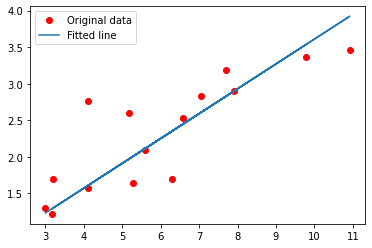

In [13]:
main()

Now let's investigate into how learning rate affects the training process.

===> Question 5: Experiments with different learning rates and num_epochs.   
When will the training diverges? What's your suggested value for the learning rate?   
Justify your answer by running more experiments (leaving the results in the notebook). (5')     
===> Answer:

```
Detailed answer is provided in the code blocks below.
```

Epoch [5/60], Loss: 45786146671689728.0000
Epoch [10/60], Loss: 726791150639377388894590512748560384.0000
Epoch [15/60], Loss: inf
Epoch [20/60], Loss: inf
Epoch [25/60], Loss: nan
Epoch [30/60], Loss: nan
Epoch [35/60], Loss: nan
Epoch [40/60], Loss: nan
Epoch [45/60], Loss: nan
Epoch [50/60], Loss: nan
Epoch [55/60], Loss: nan
Epoch [60/60], Loss: nan


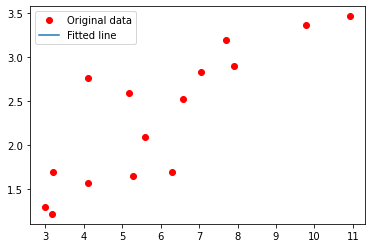

In [14]:
main(learning_rate=1, num_epochs = 60)

## Answer 5

In [15]:
# Modifying main() to return loss in last iteration

def main(learning_rate=0.001, num_epochs = 60):
  # Linear regression model
  model = nn.Linear(input_size, output_size)

  # Loss and optimizer
  criterion = nn.MSELoss()

  # Create optimizer
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # Train the model
  loss = 0.0
  for epoch in range(num_epochs):
      # Convert numpy arrays to torch tensors
      inputs = torch.from_numpy(x_train)
      targets = torch.from_numpy(y_train)

      # Forward pass
      outputs = model(inputs)
      loss = criterion(targets, outputs)
      
      # Backward and optimize
      loss.backward() # backpropagation
      optimizer.step() # update the weights
      optimizer.zero_grad() # reset gradients to zero

  return loss.item()

## Optimizing learning rate

We check loss values for different learning rates by keeping no. of epochs constant. In general, we should choose the learning rate which decreases loss the fastest. This is so that the gradient of loss at the point is the minima. 

In [16]:
import math

def optimize_lr(max_lr=1):
  step_size = 0.001
  learning_rate = 0.001 ## Initial rate
  loss_vector = []
  lr_vector = []

  # keeping num_epochs constant
  while learning_rate < max_lr:
    loss = main(learning_rate, num_epochs = 60)
    if loss == float('inf') or math.isnan(loss):
      break

    lr_vector.append(learning_rate)
    loss_vector.append(loss)
    learning_rate += step_size # Increase rate linearly for each iteration

  return lr_vector, loss_vector

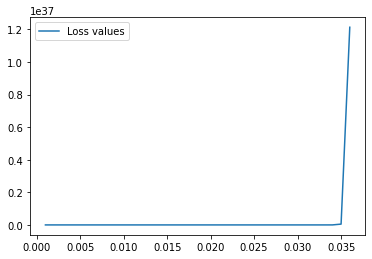

In [17]:
lr_vector, loss_vector = optimize_lr()

plt.plot(lr_vector, loss_vector, label='Loss values')
plt.legend()
plt.show()

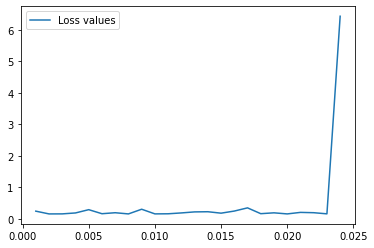

In [18]:
lr_vector, loss_vector = optimize_lr(0.025)

plt.plot(lr_vector, loss_vector, label='Loss values')
plt.legend()
plt.show()

We see that the loss value increases exponentially after learning rate >= 0.025. **Therefore, training starts to diverge at this point.**

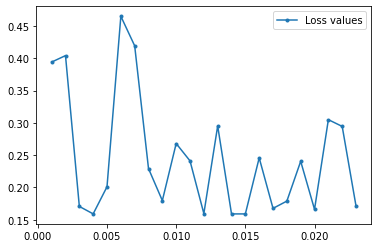

In [19]:
lr_vector, loss_vector = optimize_lr(0.024)

plt.plot(lr_vector, loss_vector, '.-', label='Loss values')
plt.legend()
plt.show()

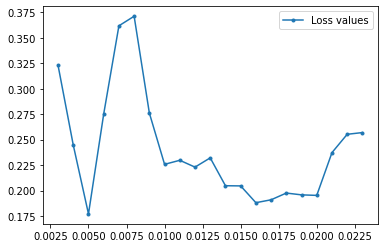

In [20]:
## Smoothing the graph using simple moving average so that it is easy to suggest ranges

window = 3
average_loss = []

for ind in range(window - 1):
  average_loss.insert(0, np.nan)

for ind in range(len(loss_vector) - window + 1):
  average_loss.append(np.mean(loss_vector[ind:ind+window]))

plt.plot(lr_vector, average_loss, '.-', label='Loss values')
plt.legend()
plt.show()

We see that loss value decreases with increasing the learning rate. However, it starts to become stable after around `learning_rate >= 0.01`. **Thus, we can take the learning rate between the range (0.0075 - 0.009) as the loss decreases the fastest in this range.**

## Optimizing no. of epochs

We check loss values for different no. of epochs by keeping learning rates constant. In general, higher no. of epochs might give lower loss values but may result in overfitting.

In [25]:
# Fix learning rate, change num_epochs

def optimize_no_epochs(min_epochs=1, max_epochs=100):
  step_size = 5
  loss_vector = []
  epoch_vector = []

  # keeping learning_rate constant
  while min_epochs < max_epochs:
    loss = main(learning_rate=0.008, num_epochs = min_epochs)
    if loss == float('inf') or math.isnan(loss):
      break

    epoch_vector.append(min_epochs)
    loss_vector.append(loss)
    min_epochs += step_size

  return epoch_vector, loss_vector

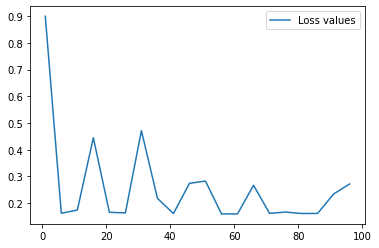

In [26]:
epoch_vector, loss_vector = optimize_no_epochs(min_epochs=1, max_epochs=100)

plt.plot(epoch_vector, loss_vector, label='Loss values')
plt.legend()
plt.show()

Loss decreases exponentially after ~5 epochs.

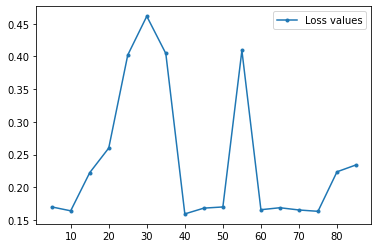

In [29]:
epoch_vector, loss_vector = optimize_no_epochs(min_epochs=5, max_epochs=90)

plt.plot(epoch_vector, loss_vector, '.-', label='Loss values')
plt.legend()
plt.show()

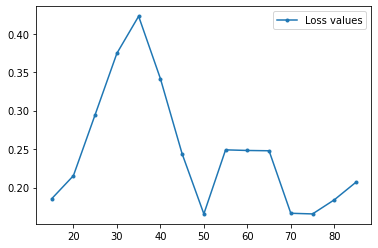

In [30]:
## Smoothing the graph using simple moving average so that it is easy to suggest ranges

window = 3
average_loss = []

for ind in range(window - 1):
  average_loss.insert(0, np.nan)

for ind in range(len(loss_vector) - window + 1):
  average_loss.append(np.mean(loss_vector[ind:ind+window]))

plt.plot(epoch_vector, average_loss, '.-', label='Loss values')
plt.legend()
plt.show()

We see that the loss value is lowest for no_epochs > 60 but its possible that the model is overfitting. **Thus, keep number of epochs between 55-65.**